# Pymaceuticals Inc.
---

### Analysis

- Mice treated with a regimen of Capomulin were most likely to survive compared with the other eight drug regimens.
- Mice treated with a regimen of Propriva were the least likely to survive compared with the other eight drug regimens.
- The distribution of male and female mice in the study was fairly equal.
- The correlation of 0.84 between weight and tumor volume shows that the tumor volume directly correlates to the weight of the mouse.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
mice_total = combined_df["Mouse ID"].unique()
mice_cleaned = len(mice_total)
mice_cleaned

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_id_repeat = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_id_repeat

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_repeat_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
mice_repeat_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined_df[combined_df['Mouse ID'].isin(mice_id_repeat)==False]
clean_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
mice_total_new = clean_combined["Mouse ID"].unique()
mice_cleaned = len(mice_total_new)
mice_cleaned

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_combined['Tumor Volume (mm3)'].groupby(clean_combined['Drug Regimen']).mean()
median = clean_combined['Tumor Volume (mm3)'].groupby(clean_combined['Drug Regimen']).median()
var = clean_combined['Tumor Volume (mm3)'].groupby(clean_combined['Drug Regimen']).var()
std = clean_combined['Tumor Volume (mm3)'].groupby(clean_combined['Drug Regimen']).std()
sem = clean_combined['Tumor Volume (mm3)'].groupby(clean_combined['Drug Regimen']).sem()

stat_summary = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line

stat_summary_agg =  clean_combined.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
stat_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

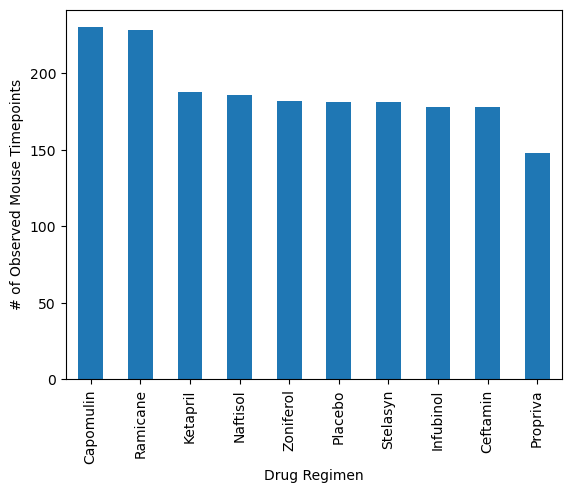

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_rows = clean_combined["Drug Regimen"].value_counts()
mice_plot = mice_rows.plot.bar()
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

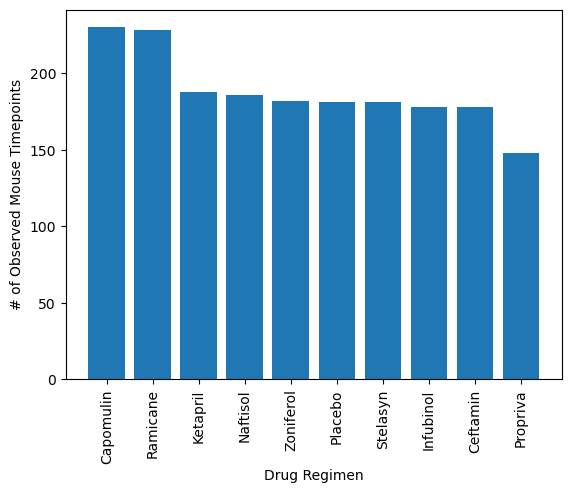

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice_rows.index.values, mice_rows.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

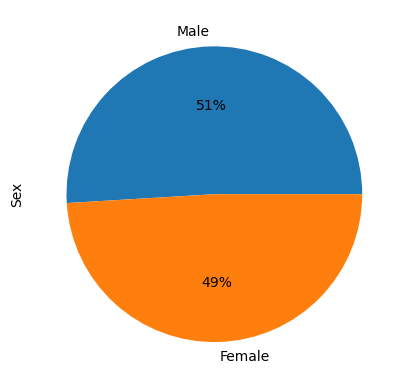

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_difference = clean_combined["Sex"].value_counts()
Sex = ["Male", "Female"]
sex_difference.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

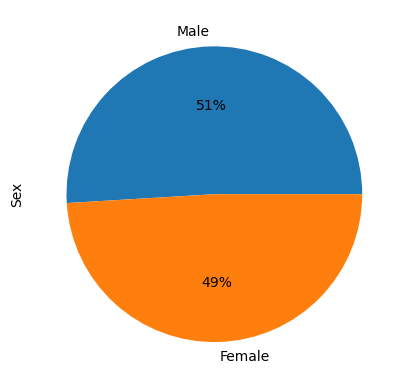

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = sex_difference.index.values
sex_count = sex_difference.values
plt.ylabel("Sex")
plt.pie(sex_count, labels = sex_labels, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_combined.loc[clean_combined["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_combined.loc[clean_combined["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_combined.loc[clean_combined["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_combined.loc[clean_combined["Drug Regimen"] == "Ceftamin", :]


regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimens = clean_combined[clean_combined["Drug Regimen"].isin(regimen_list)]
regimens.head()

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = regimens.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
greatest_timepoint = greatest_timepoint.stack(level=0).unstack(level=0)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = 0
for regimen in regimen_list:

    quartiles = greatest_timepoint[regimen].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatment == 0:
        print(f"------------------------------------------------------------")
        print(f"The lower quartile of {regimen} is: {lowerq}")
        print(f"The upper quartile of {regimen} is: {upperq}")
        print(f"The interquartile range of {regimen} is: {iqr}")
        print(f"{regimen}'s potential outliers: values below {lower_bound} and above {upper_bound}")

------------------------------------------------------------
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
Capomulin's potential outliers: values below 20.71 and above 51.83
------------------------------------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
Ramicane's potential outliers: values below 17.91 and above 54.31
------------------------------------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
Infubinol's potential outliers: values below 36.83 and above 82.75
------------------------------------------------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
Ceftamin's potential outliers: values belo

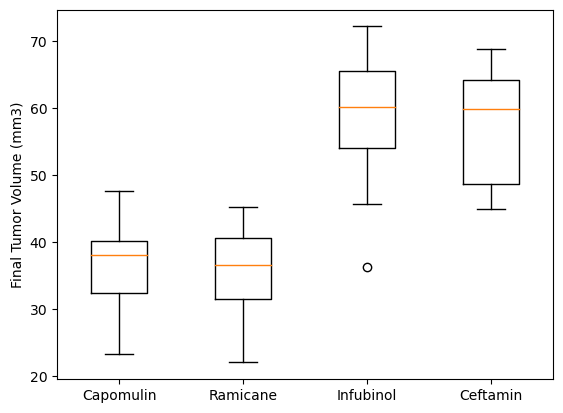

In [33]:
boxplot_data = []
for regimen in regimen_list:
    boxplot_data.append(list(greatest_timepoint[regimen].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.boxplot(boxplot_data)
plt.xticks(range(1, len(regimen_list)+1), regimen_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plotts

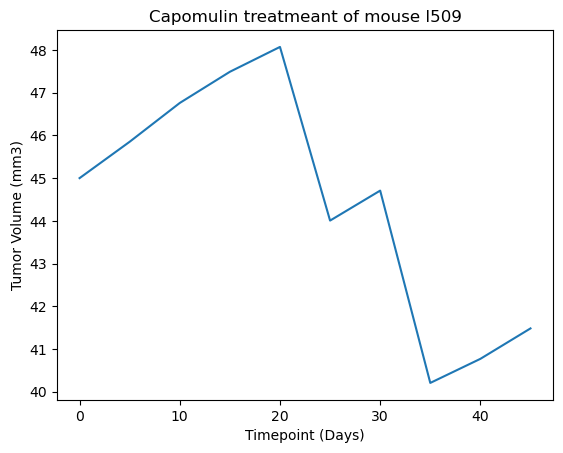

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = line["Timepoint"]
tum_vol = line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tum_vol, label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

/var/folders/x_/w0dx3kjs5qs2q085wv0my_gc0000gn/T/ipykernel_5428/3668678619.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_vol_avg = capomulin_df.groupby(['Mouse ID']).mean()


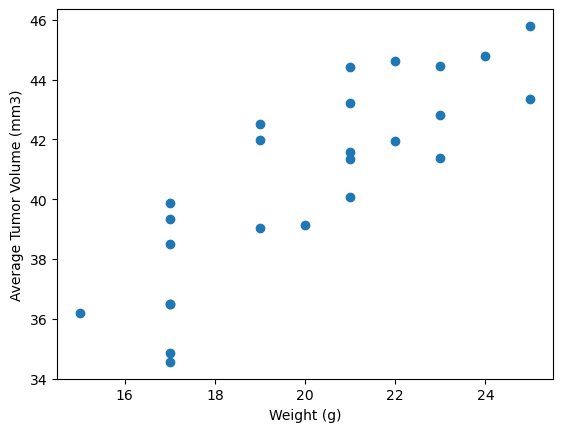

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
cap_vol_avg = capomulin_df.groupby(['Mouse ID']).mean()

#marker_size=15
plt.scatter(cap_vol_avg['Weight (g)'],cap_vol_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


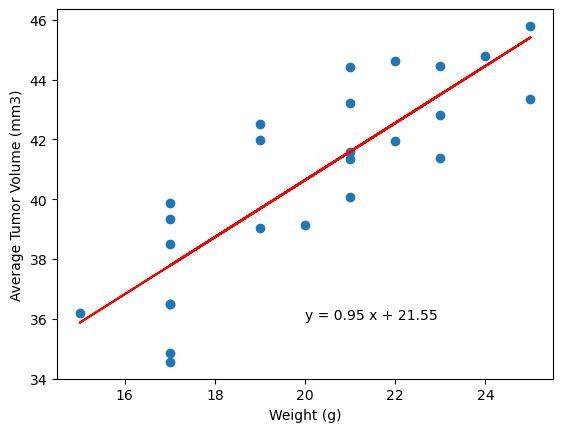

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(cap_vol_avg['Weight (g)'],cap_vol_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(cap_vol_avg["Weight (g)"],cap_vol_avg["Tumor Volume (mm3)"])
regress_values=cap_vol_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_vol_avg["Weight (g)"],cap_vol_avg["Tumor Volume (mm3)"])
plt.plot(cap_vol_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()